In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('heart_v2.csv')
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [28]:
df.shape

(270, 4)

In [3]:
df.isnull().sum()

age              0
sex              0
BP               0
cholestrol       0
heart disease    0
dtype: int64

In [4]:
X=df
y=X.pop('heart disease')

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=42, train_size=0.7)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(189, 4)
(189,)
(81, 4)
(81,)


Decision tree

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
dt=DecisionTreeClassifier(max_depth=3, random_state=42)

In [16]:
dt.fit(X,y)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [20]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz


def get_graph(decision_tree):
    
    dot_data=StringIO()
    
    export_graphviz(decision_tree, out_file=dot_data, filled=True, rounded=True, feature_names=X.columns,
                   class_names=['No Disease', 'Disease'])
    
    graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
    
    return graph    

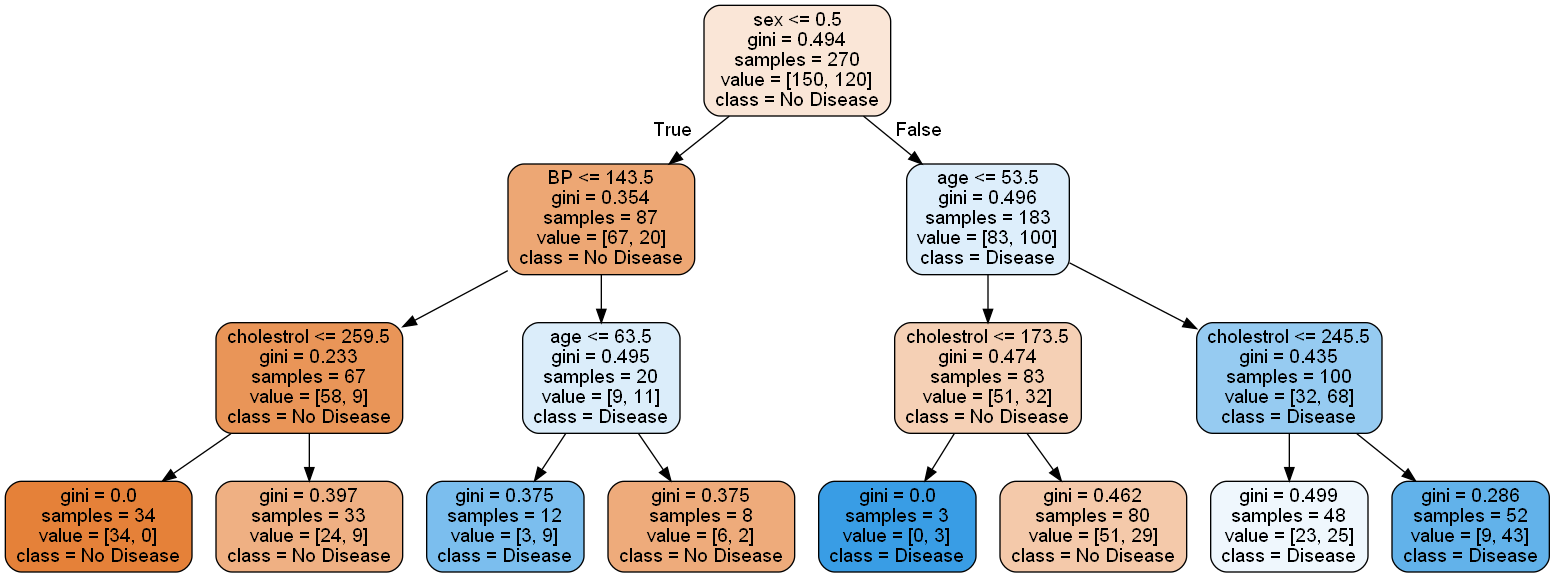

In [21]:
grph=get_graph(dt)
Image(grph.create_png())

In [22]:
y_train_pred=dt.predict(X_train)

In [23]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print(accuracy_score(y_train, y_train_pred))
conf_mat=confusion_matrix(y_train, y_train_pred)

0.7248677248677249


In [24]:
conf_mat

array([[78, 23],
       [29, 59]], dtype=int64)

In [25]:
train_sensitivity=conf_mat[1,1]/(conf_mat[1,0]+conf_mat[1,1])
train_specificity=conf_mat[0,0]/(conf_mat[0,0]+conf_mat[0,1])
print(train_sensitivity)
print(train_specificity)

0.6704545454545454
0.7722772277227723


Hyper Parameter Tuning

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
dt1=DecisionTreeClassifier(random_state=42)

In [29]:
params={
    'max_depth':[3,4,5,6,8,10,15,20,50],
    'min_samples_split':[5,10,15],
    'min_samples_leaf':[5,7,8],
    'criterion':['gini', 'entropy']
}

In [31]:
grid_search=GridSearchCV(estimator=dt1,
                         param_grid=params, 
                         cv=4, 
                         n_jobs=-1, 
                         verbose=1, 
                         scoring='accuracy'
                        )

In [32]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 162 candidates, totalling 648 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 560 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 625 out of 648 | elapsed:    3.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 648 out of 648 | elapsed:    3.6s finished


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 8, 10, 15, 20, 50],
                         'min_samples_leaf': [5, 7, 8],
                         'min_samples_split': [5, 10, 15]},
             scoring='accuracy', verbose=1)

In [36]:
dt_best=grid_search.best_estimator_

In [51]:
dt_best

DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, min_samples_split=5,
                       random_state=42)

In [48]:
def eval(decisiontree):
    y_train_pred=decisiontree.predict(X_train)
    y_test_pred=decisiontree.predict(X_test)
    
    print('train accuracy score: ', accuracy_score(y_train, y_train_pred))
    print('test accuracy score: ', accuracy_score(y_test, y_test_pred))
    train_conf_mat=confusion_matrix(y_train, y_train_pred)
    test_conf_mat=confusion_matrix(y_test, y_test_pred)
    
    
    print('train sensitivity', train_conf_mat[1,1]/(train_conf_mat[1,0]+train_conf_mat[1,1]))
    print('train specificity', train_conf_mat[0,0]/(train_conf_mat[0,0]+train_conf_mat[0,1]))
    
    print('test sensitivity', test_conf_mat[1,1]/(test_conf_mat[1,0]+test_conf_mat[1,1]))
    print('test specificity', test_conf_mat[0,0]/(test_conf_mat[0,0]+test_conf_mat[0,1]))

In [49]:
eval(dt_best)

train accuracy score:  0.7777777777777778
test accuracy score:  0.6419753086419753
train sensitivity 0.7386363636363636
train specificity 0.8118811881188119
test sensitivity 0.53125
test specificity 0.7142857142857143


High variance.. Trying other hyper parameter

In [50]:
dt2=DecisionTreeClassifier(random_state=42)

In [52]:
params={
    'max_depth':[6,8,10,15,20,50],
    'min_samples_split':[10,15],
    'min_samples_leaf':[5,7,8],
    'criterion':['gini', 'entropy']
}

In [53]:
grid_search=GridSearchCV(estimator=dt1,
                         param_grid=params, 
                         cv=4, 
                         n_jobs=-1, 
                         verbose=1, 
                         scoring='accuracy'
                        )

In [54]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 72 candidates, totalling 288 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed:    2.3s finished


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 8, 10, 15, 20, 50],
                         'min_samples_leaf': [5, 7, 8],
                         'min_samples_split': [10, 15]},
             scoring='accuracy', verbose=1)

In [55]:
dt_best=grid_search.best_estimator_

In [56]:
dt_best

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=8,
                       min_samples_split=10, random_state=42)

In [58]:
eval(dt_best)

train accuracy score:  0.7883597883597884
test accuracy score:  0.6172839506172839
train sensitivity 0.7272727272727273
train specificity 0.8415841584158416
test sensitivity 0.5
test specificity 0.6938775510204082


### Model 3

In [59]:
dt3=DecisionTreeClassifier(random_state=42)

In [264]:
params={
    'max_depth':[4,5,6,7,8,10,15,20,50],
    'min_samples_split':[9,10,11,12],
    'min_samples_leaf':[9,10,11],
    'criterion':['gini', 'entropy']
}

In [265]:
grid_search=GridSearchCV(estimator=dt1,
                         param_grid=params, 
                         cv=4, 
                         n_jobs=-1, 
                         verbose=1, 
                         scoring='accuracy'
                        )

In [266]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 216 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 800 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:    0.8s finished


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 10, 15, 20, 50],
                         'min_samples_leaf': [9, 10, 11],
                         'min_samples_split': [9, 10, 11, 12]},
             scoring='accuracy', verbose=1)

In [267]:
dt_best=grid_search.best_estimator_

In [268]:
dt_best

DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, min_samples_split=9,
                       random_state=42)

In [269]:
def eval(decisiontree):
    y_train_pred=decisiontree.predict(X_train)
    y_test_pred=decisiontree.predict(X_test)
    
    print('train accuracy score: ', accuracy_score(y_train, y_train_pred))
    print('test accuracy score: ', accuracy_score(y_test, y_test_pred))
    train_conf_mat=confusion_matrix(y_train, y_train_pred)
    test_conf_mat=confusion_matrix(y_test, y_test_pred)
    
    
    print('train sensitivity', train_conf_mat[1,1]/(train_conf_mat[1,0]+train_conf_mat[1,1]))
    print('train specificity', train_conf_mat[0,0]/(train_conf_mat[0,0]+train_conf_mat[0,1]))
    
    print('test sensitivity', test_conf_mat[1,1]/(test_conf_mat[1,0]+test_conf_mat[1,1]))
    print('test specificity', test_conf_mat[0,0]/(test_conf_mat[0,0]+test_conf_mat[0,1]))

In [270]:
eval(dt_best)

train accuracy score:  0.746031746031746
test accuracy score:  0.6666666666666666
train sensitivity 0.6818181818181818
train specificity 0.801980198019802
test sensitivity 0.59375
test specificity 0.7142857142857143


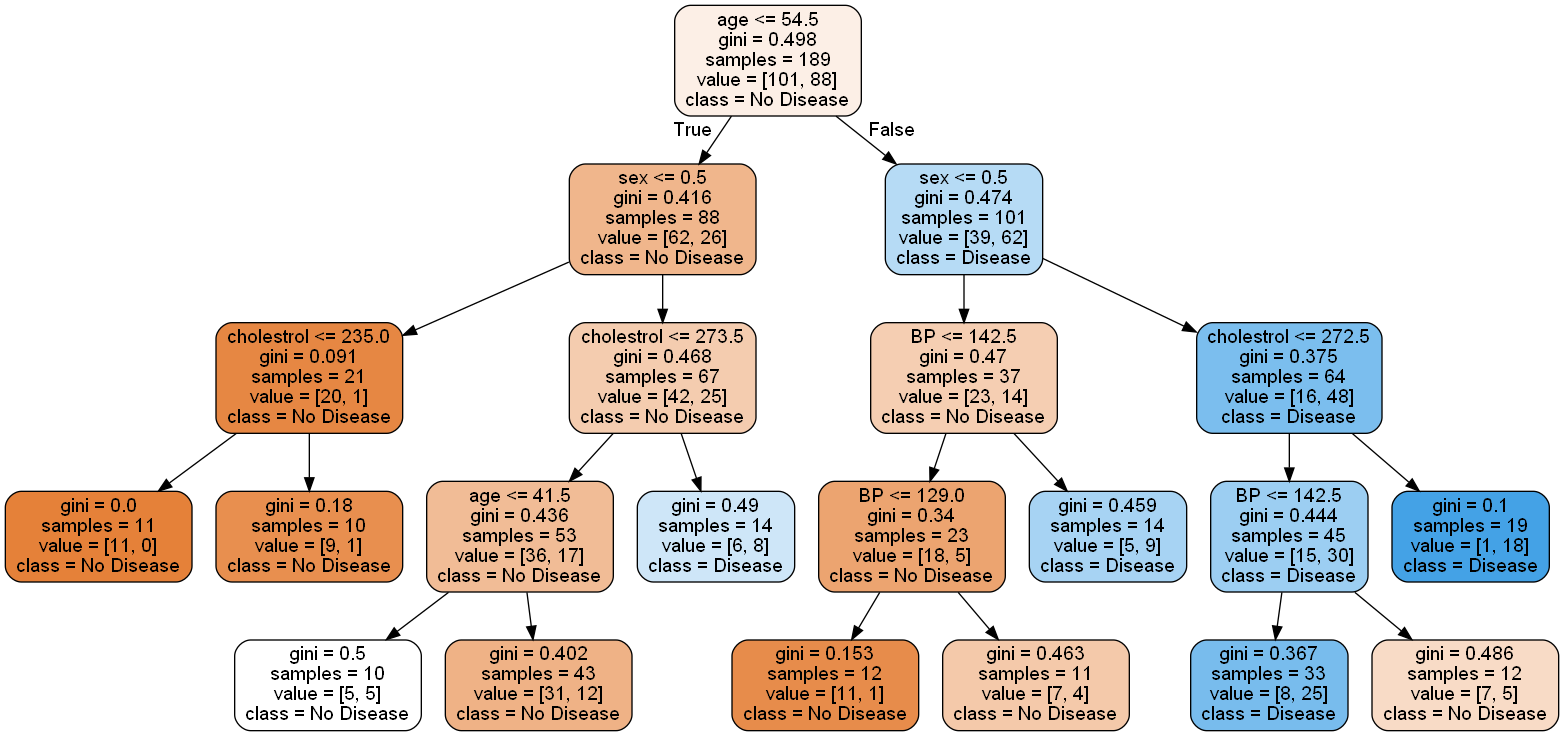

In [271]:
grph=get_graph(dt_best)
Image(grph.create_png())